<a href="https://colab.research.google.com/github/abdishakurM/jupyter/blob/master/Stock_price_pridiction__SCO411.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SCO 411 NEURAL NETWORKS 
## MINI PROJECT

### Group Members
<ol>
  <li> Abdishakur Mohamed Ali - i163s/19690/2016 </li>
  <li>Edmund Mbatha - i163/5078/2016 </li>
</ol>

## Project Overview 

This is a python program that predicts the price of stocks using a machine learning technique called Long Short-Term Memory (LSTM) which is an artificial recurrent neural network (RNN) commonly used in the field of deep learning for time series data.

The program is designed to accept any stock for any company hosted on the Yahoo! Finance database and for any specific timeframe. 
Given the volatility of the stock prices due to the Corona pendemic we have decided to exclude the 2020 data.

The data is split into 80% for training and 20% for testing and the model is trained to predict the closing price for a given day given the closing prices of the last 60 days. 

The LSTM model is built to have two LSTM layers with 50 neurons each and two Dense layers, one with 25 neurons and the other with 1 neuron and compiled using the mean squared error (MSE) loss function and the adam optimizer.

We use a batch size of one since we are interested in every single day but use epochs size of 10 to increase the number of iterations when the entire data set is passed forward and backward through the neural network to increase accuracy without the risk of much overfitting.

We are using Apple Inc. stock here but have also used the same model for Microsoft and Tesla stocks and the results are of ccomparative acccuracy.






In [ ]:
#Import the libraries
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [ ]:
#Get the stock quote 
df = web.DataReader('AAPL', data_source='yahoo', start='2015-01-01', end='2020-01-01')  # 'AAPL' gets Apple Inc. stock
#Show the data 
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2015-01-02,27.860001,26.837500,27.847500,27.332500,212818400.0,24.941502
2015-01-05,27.162500,26.352501,27.072500,26.562500,257142000.0,24.238857
2015-01-06,26.857500,26.157499,26.635000,26.565001,263188400.0,24.241146
2015-01-07,27.049999,26.674999,26.799999,26.937500,160423600.0,24.581060
2015-01-08,28.037500,27.174999,27.307501,27.972500,237458000.0,25.525522
...,...,...,...,...,...,...
2019-12-24,71.222504,70.730003,71.172501,71.067497,48478800.0,70.580566
2019-12-26,72.495003,71.175003,71.205002,72.477501,93121200.0,71.980911
2019-12-27,73.492500,72.029999,72.779999,72.449997,146266000.0,71.953598


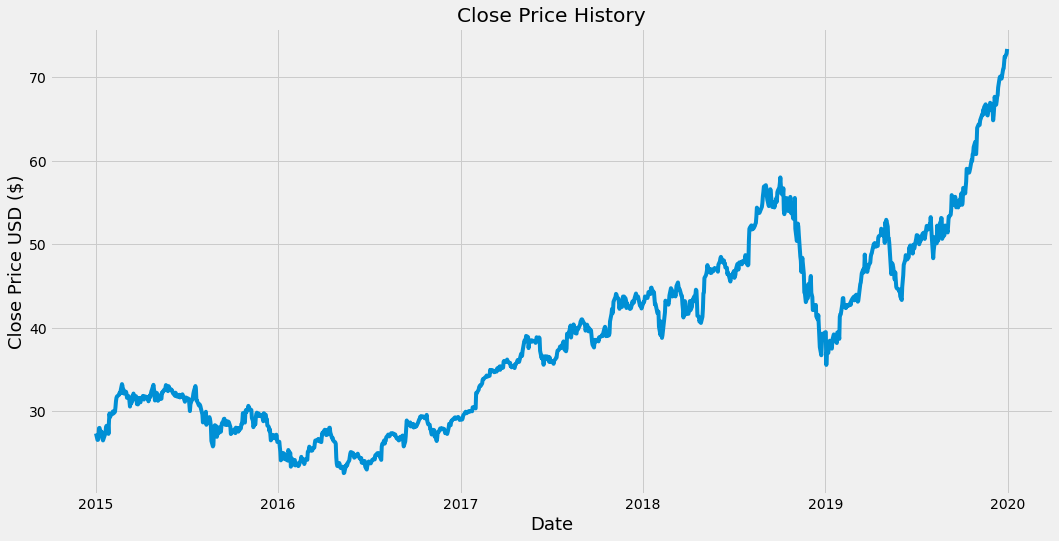

In [ ]:
#Visualize the closing price history
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price USD ($)',fontsize=18)
plt.show()

In [ ]:
#Create a new dataframe with only the 'Close' column
data = df.filter(['Close'])
#Converting the dataframe to a numpy array
dataset = data.values
#Get /Compute the number of rows to train the model on
training_data_len = math.ceil( len(dataset) *.8) 

In [ ]:
#Scale the all of the data to be values between 0 and 1 
scaler = MinMaxScaler(feature_range=(0, 1)) 
scaled_data = scaler.fit_transform(dataset)

In [ ]:
#Create the scaled training data set 
train_data = scaled_data[0:training_data_len  , : ]
#Split the data into x_train and y_train data sets
x_train=[]
y_train = []
for i in range(60,len(train_data)):
    x_train.append(train_data[i-60:i,0])
    y_train.append(train_data[i,0])

In [ ]:
#Convert x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

In [ ]:
#Reshape the data into the shape accepted by the LSTM
x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))

In [ ]:
#Build the LSTM network model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dense(units=25))
model.add(Dense(units=1))

In [ ]:
#Compile the model using the mean squared error
model.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
#Train the model
model.fit(x_train, y_train, batch_size=1, epochs=10)

Epoch 1/10
947/947 [==============================] - 23s 25ms/step - loss: 0.0014
Epoch 2/10
947/947 [==============================] - 23s 24ms/step - loss: 7.4275e-04
Epoch 3/10
947/947 [==============================] - 22s 23ms/step - loss: 5.1582e-04
Epoch 4/10
947/947 [==============================] - 22s 23ms/step - loss: 4.0742e-04
Epoch 5/10
947/947 [==============================] - 23s 24ms/step - loss: 4.6251e-04
Epoch 6/10
947/947 [==============================] - 22s 23ms/step - loss: 3.3714e-04
Epoch 7/10
947/947 [==============================] - 22s 24ms/step - loss: 3.0430e-04
Epoch 8/10
947/947 [==============================] - 22s 23ms/step - loss: 3.0486e-04
Epoch 9/10
947/947 [==============================] - 21s 22ms/step - loss: 2.8370e-04
Epoch 10/10
947/947 [==============================] - 21s 22ms/step - loss: 3.3424e-04


In [ ]:
#Test data set
test_data = scaled_data[training_data_len - 60: , : ]
#Create the x_test and y_test data sets
x_test = []
y_test =  dataset[training_data_len : , : ] 
for i in range(60,len(test_data)):
    x_test.append(test_data[i-60:i,0])

In [ ]:
#Convert x_test to a numpy array 
x_test = np.array(x_test)

In [ ]:
#Reshape the data into the shape accepted by the LSTM i.e 3D
x_test = np.reshape(x_test, (x_test.shape[0],x_test.shape[1],1))

In [ ]:
#Getting the models predicted price values
predictions = model.predict(x_test) 
#Undo scaling
predictions = scaler.inverse_transform(predictions)

In [ ]:
#Calculate the value of the mean squared error (RMSE)
rmse=np.sqrt(np.mean(((predictions- y_test)**2)))
rmse

0.95030168776192

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


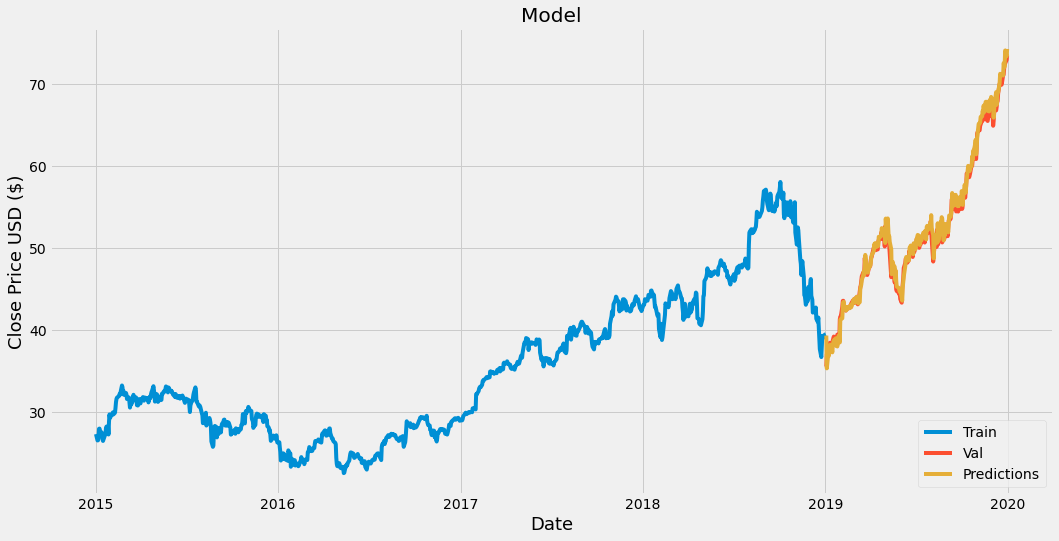

In [ ]:
#Plot/Create the data for the graph
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
#Visualize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()